In [1]:
import sys
sys.path.append('./code')
sys.path.append('./data')

from clustering import *

np.random.seed(1)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
# set up tests
nClusters = 4
nStates= 3
tt, qq = generateChains(nStates, nClusters) # randomly generate chains
mixtureProbs = np.repeat(1 / nClusters, nClusters)  # uniform for now
N = 100 # number of trajectories
T = 30 # number of time pts
Xt, trueLabels = generateTrajectories(N, T, mixtureProbs, qq, tt) # sample

Xt = Xt[np.argsort(trueLabels),:]
trueLabels = trueLabels[np.argsort(trueLabels)]

zTrue = np.zeros((N, nClusters))
zTrue[np.arange(N),trueLabels.T]=1

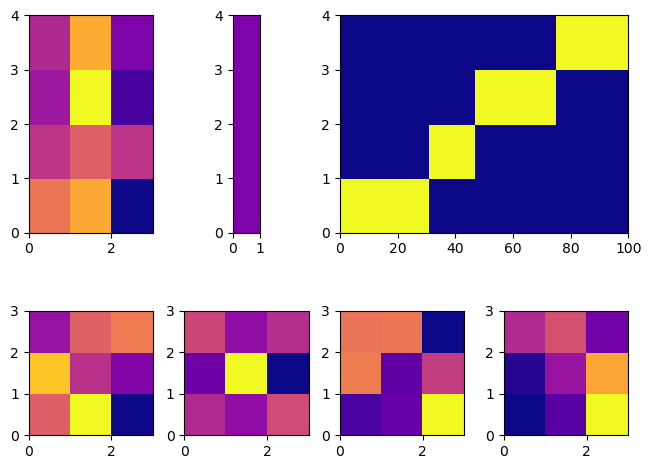

In [3]:
from cmcrameri import cm
cc = "plasma"#cm.plasma;
fig = plt.figure(layout="constrained")
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 4, figure=fig)
tt0_ax = fig.add_subplot(gs[-1, 0])
tt1_ax = fig.add_subplot(gs[-1, 1])
tt2_ax = fig.add_subplot(gs[-1, 2])
tt3_ax = fig.add_subplot(gs[-1, 3])

tt0_ax.set_aspect('equal')
tt1_ax.set_aspect('equal')
tt2_ax.set_aspect('equal')
tt3_ax.set_aspect('equal')


tt0_ax.pcolor(tt[0,:,:],cmap=cc)
tt1_ax.pcolor(tt[1,:,:],cmap=cc)
tt2_ax.pcolor(tt[2,:,:],cmap=cc)
tt3_ax.pcolor(tt[3,:,:],cmap=cc)

qq_ax = fig.add_subplot(gs[0, 0])
qq_ax.pcolor(qq,cmap=cc)
#qq_ax.set_aspect(1)


mu_ax = fig.add_subplot(gs[0,1],sharey=qq_ax)
mu_plot=mu_ax.pcolor(mixtureProbs[np.newaxis,:].T,cmap=cc)
mu_plot.set_clim(0,1)
mu_ax.set_aspect(2)


zHat_ax = fig.add_subplot(gs[0,2:4],sharey=qq_ax)
zHat_ax.pcolor(zTrue.T,cmap=cc)
#zHat_ax.set_aspect(10)


In [4]:
nEM = 1000
nClustMax=10
tol=1e-8
alphaPrior = 1.0/nClustMax
zHat, muHat, qHat, pHat, steps, logL = doVEMmulti(Xt, nClustMax, nStates, tol,  max_iters=10000,alpha=alphaPrior)

best_assignment, zHat_c, qHat_c, muHat_c, pHat_c = find_best_clustermatch(trueLabels.T, zHat, muHat, qHat, pHat)  # uses HUNGARIAN ALGORITHM to assign best permutation
predictLabels = zHat_c.argmax(axis=1)

  0%|          | 0/100 [00:00<?, ?it/s]

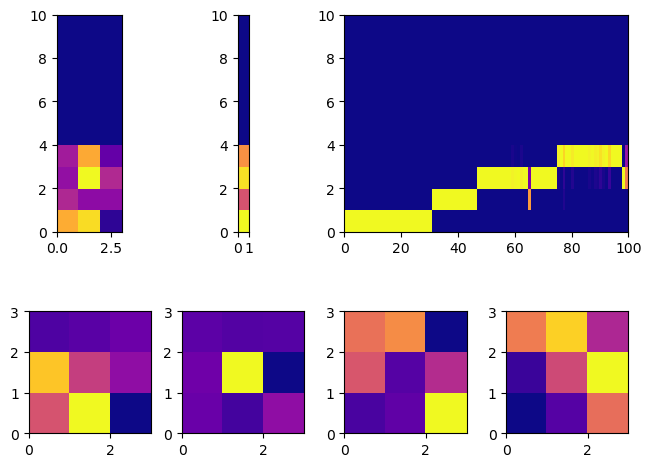

In [5]:
fig = plt.figure(layout="constrained")

from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 4, figure=fig)
tt0_ax = fig.add_subplot(gs[-1, 0])
tt1_ax = fig.add_subplot(gs[-1, 1])
tt2_ax = fig.add_subplot(gs[-1, 2])
tt3_ax = fig.add_subplot(gs[-1, 3])
tt0_ax.set_aspect('equal')
tt1_ax.set_aspect('equal')
tt2_ax.set_aspect('equal')
tt3_ax.set_aspect('equal')


tt0_ax.pcolor(pHat_c[0,:,:],cmap=cc)
tt1_ax.pcolor(pHat_c[1,:,:],cmap=cc)
tt2_ax.pcolor(pHat_c[2,:,:],cmap=cc)
tt3_ax.pcolor(pHat_c[3,:,:],cmap=cc)

qq_ax = fig.add_subplot(gs[0, 0])
qq_ax.pcolor(qHat_c,cmap=cc)
qq_ax.set_aspect(1)

mu_ax = fig.add_subplot(gs[0,1],sharey=qq_ax)
mu_ax.pcolor(muHat_c[np.newaxis,:].T,cmap=cc)
mu_ax.set_aspect(2)

zHat_ax = fig.add_subplot(gs[0,2:4],sharey=qq_ax)
zHat_ax.pcolor(zHat_c.T,cmap=cc)
#zHat_ax.set_aspect(0.1)

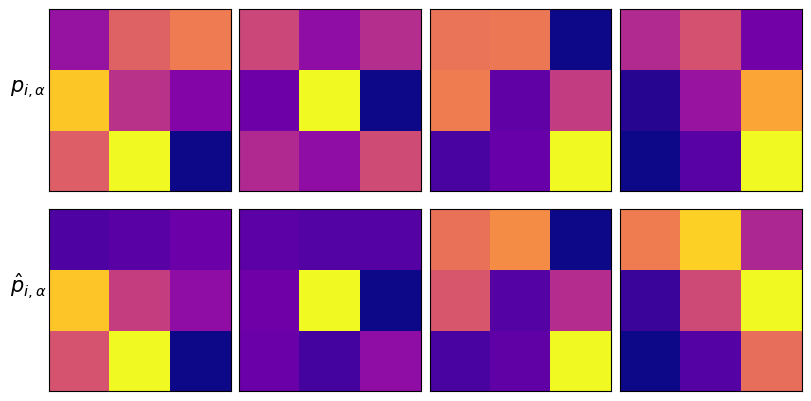

In [10]:
fig = plt.figure(layout="constrained",figsize=(8,4))

from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 4, figure=fig)
tt0_ax = fig.add_subplot(gs[0, 0])
tt1_ax = fig.add_subplot(gs[0, 1])
tt2_ax = fig.add_subplot(gs[0, 2])
tt3_ax = fig.add_subplot(gs[0, 3])
tt0_ax.set_aspect('equal')
tt1_ax.set_aspect('equal')
tt2_ax.set_aspect('equal')
tt3_ax.set_aspect('equal')


tt0_ax.pcolor(tt[0,:,:],cmap=cc)
tt1_ax.pcolor(tt[1,:,:],cmap=cc)
tt2_ax.pcolor(tt[2,:,:],cmap=cc)
tt3_ax.pcolor(tt[3,:,:],cmap=cc)

tt0_ax2 = fig.add_subplot(gs[1, 0])
tt1_ax2 = fig.add_subplot(gs[1, 1])
tt2_ax2 = fig.add_subplot(gs[1, 2])
tt3_ax2 = fig.add_subplot(gs[1, 3])
tt0_ax2.set_aspect('equal')
tt1_ax2.set_aspect('equal')
tt2_ax2.set_aspect('equal')
tt3_ax2.set_aspect('equal')


tt0_ax2.pcolor(pHat_c[0,:,:],cmap=cc)
tt1_ax2.pcolor(pHat_c[1,:,:],cmap=cc)
tt2_ax2.pcolor(pHat_c[2,:,:],cmap=cc)
tt3_ax2.pcolor(pHat_c[3,:,:],cmap=cc)

tt0_ax2.axes.xaxis.set_ticks([])
tt0_ax2.axes.yaxis.set_ticks([])

tt1_ax2.axes.xaxis.set_ticks([])
tt1_ax2.axes.yaxis.set_ticks([])

tt2_ax2.axes.xaxis.set_ticks([])
tt2_ax2.axes.yaxis.set_ticks([])

tt3_ax2.axes.xaxis.set_ticks([])
tt3_ax2.axes.yaxis.set_ticks([])


tt0_ax.axes.xaxis.set_ticks([])
tt0_ax.axes.yaxis.set_ticks([])

tt1_ax.axes.xaxis.set_ticks([])
tt1_ax.axes.yaxis.set_ticks([])

tt2_ax.axes.xaxis.set_ticks([])
tt2_ax.axes.yaxis.set_ticks([])

tt3_ax.axes.xaxis.set_ticks([])
tt3_ax.axes.yaxis.set_ticks([])


tt0_ax2.set_ylabel('$\hat{p}_{i,\\alpha}$',rotation=0,labelpad=15,fontsize=15)
tt0_ax.set_ylabel('$p_{i,\\alpha}$',rotation=0,labelpad=15,fontsize=15)

fig.savefig("figs/example_fig_a.pdf", format="pdf")

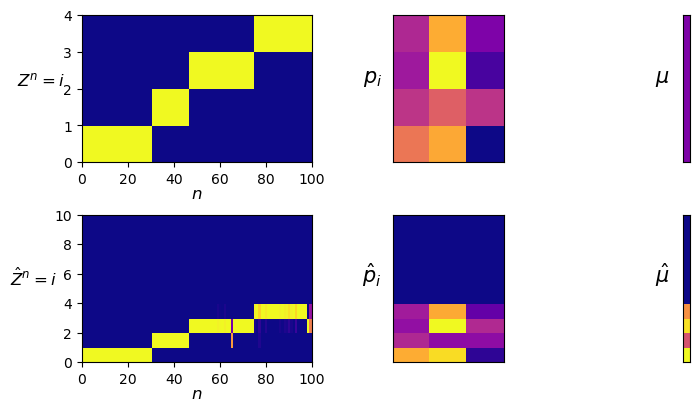

In [9]:
fig = plt.figure(layout="constrained",figsize=(8,4))

from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 3, figure=fig)

qq_ax = fig.add_subplot(gs[0, 1])
qq_ax.pcolor(qq,cmap=cc)
qq_ax.set_aspect(1)


mu_ax = fig.add_subplot(gs[0,2],sharey=qq_ax)
mu_plot=mu_ax.pcolor(mixtureProbs[np.newaxis,:].T,cmap=cc)
mu_plot.set_clim(0,1)
mu_ax.set_aspect(5)


zHat_ax = fig.add_subplot(gs[0,0])
zHat_ax.pcolor(zTrue.T,cmap=cc)
#zHat_ax.set_aspect(0.1)

qq_ax2 = fig.add_subplot(gs[1, 1],sharex=qq_ax)
qq_ax2.pcolor(qHat_c,cmap=cc)
qq_ax2.set_aspect(0.4)

mu_ax2 = fig.add_subplot(gs[1,2],sharey=qq_ax2)
mu_ax2.pcolor(muHat_c[np.newaxis,:].T,cmap=cc)
mu_ax2.set_aspect(2)

zHat_ax2 = fig.add_subplot(gs[1,0])
zHat_ax2.pcolor(zHat_c.T,cmap=cc)
#zHat_ax2.set_aspect(0)

#zHat_ax.axes.xaxis.set_ticks([])
#zHat_ax.axes.yaxis.set_ticks([])
mu_ax.axes.xaxis.set_ticks([])
mu_ax.axes.yaxis.set_ticks([])
qq_ax.axes.xaxis.set_ticks([])
qq_ax.axes.yaxis.set_ticks([])

#zHat_ax2.axes.xaxis.set_ticks([])
#zHat_ax2.axes.yaxis.set_ticks([])
mu_ax2.axes.xaxis.set_ticks([])
mu_ax2.axes.yaxis.set_ticks([])
qq_ax2.axes.xaxis.set_ticks([])
qq_ax2.axes.yaxis.set_ticks([])

zHat_ax.set_ylabel('$Z^n=i$',rotation=0,labelpad=16,fontsize=12)
zHat_ax.set_xlabel('$n$',rotation=0,labelpad=0,fontsize=12)

zHat_ax2.set_ylabel('$\hat{Z}^n=i$',rotation=0,labelpad=15,fontsize=12)
zHat_ax2.set_xlabel('$n$',rotation=0,labelpad=0,fontsize=12)

qq_ax.set_ylabel('$p_i$',rotation=0,labelpad=15,fontsize=15)
qq_ax2.set_ylabel('$\hat{p}_i$',rotation=0,labelpad=15,fontsize=15)

mu_ax.set_ylabel('$\mu$',rotation=0,labelpad=15,fontsize=15)
mu_ax2.set_ylabel('$\hat{\\mu}$',rotation=0,labelpad=15,fontsize=15)

fig.savefig("figs/example_fig_b.pdf", format="pdf")